In [3]:
import os
import time
import datetime as dt
import xarray as xr
from datetime import datetime
import pandas
import matplotlib.pyplot as plt
import numpy as np
import math
import geopy.distance
from math import sin, pi
from scipy import interpolate
from scipy import stats

#functions for running storm data
import sys

####################you will need to change some paths here!#####################
#list of input directories
dir_storm_info='f:/data/tc_wakes/database/info/'
dir_out='f:/data/tc_wakes/database/sst/'



In [33]:
#for iyr_storm in range(2002,2018):
init = 0
for iyr_storm in range(2002,2018):
    for inum_storm in range(0,110): 
        filename = dir_out + str(iyr_storm) + '/' + str(inum_storm).zfill(3) + '_interpolated_track.nc'
        exists = os.path.isfile(filename)
        if not exists:
            continue
        print(filename)
        ds_storm_info=xr.open_dataset(filename)
        ds_storm_info = ds_storm_info.sel(j2=0)
        ds_storm_info.close()
        ds_storm_info['sindex']=ds_storm_info.pres
        ds_storm_info['sindex']=iyr_storm+inum_storm/120
#        if abs(ds_storm_info.lon[-1]-ds_storm_info.lon[0])>180:
#            ds_storm_info['lon'] = np.mod(ds_storm_info['lon'], 360)
        if init==0:
            ds_all = ds_storm_info
            init=1
        ds_all = xr.concat([ds_all, ds_storm_info], dim='i2')


f:/data/tc_wakes/database/sst/2002/001_interpolated_track.nc
f:/data/tc_wakes/database/sst/2002/002_interpolated_track.nc
f:/data/tc_wakes/database/sst/2002/005_interpolated_track.nc
f:/data/tc_wakes/database/sst/2002/007_interpolated_track.nc
f:/data/tc_wakes/database/sst/2002/009_interpolated_track.nc
f:/data/tc_wakes/database/sst/2002/010_interpolated_track.nc
f:/data/tc_wakes/database/sst/2002/011_interpolated_track.nc
f:/data/tc_wakes/database/sst/2002/012_interpolated_track.nc
f:/data/tc_wakes/database/sst/2002/013_interpolated_track.nc
f:/data/tc_wakes/database/sst/2002/014_interpolated_track.nc
f:/data/tc_wakes/database/sst/2002/015_interpolated_track.nc
f:/data/tc_wakes/database/sst/2002/017_interpolated_track.nc
f:/data/tc_wakes/database/sst/2002/018_interpolated_track.nc
f:/data/tc_wakes/database/sst/2002/019_interpolated_track.nc
f:/data/tc_wakes/database/sst/2002/020_interpolated_track.nc
f:/data/tc_wakes/database/sst/2002/021_interpolated_track.nc
f:/data/tc_wakes/databas

f:/data/tc_wakes/database/sst/2004/005_interpolated_track.nc
f:/data/tc_wakes/database/sst/2004/006_interpolated_track.nc
f:/data/tc_wakes/database/sst/2004/007_interpolated_track.nc
f:/data/tc_wakes/database/sst/2004/008_interpolated_track.nc
f:/data/tc_wakes/database/sst/2004/009_interpolated_track.nc
f:/data/tc_wakes/database/sst/2004/011_interpolated_track.nc
f:/data/tc_wakes/database/sst/2004/012_interpolated_track.nc
f:/data/tc_wakes/database/sst/2004/013_interpolated_track.nc
f:/data/tc_wakes/database/sst/2004/014_interpolated_track.nc
f:/data/tc_wakes/database/sst/2004/015_interpolated_track.nc
f:/data/tc_wakes/database/sst/2004/016_interpolated_track.nc
f:/data/tc_wakes/database/sst/2004/017_interpolated_track.nc
f:/data/tc_wakes/database/sst/2004/018_interpolated_track.nc
f:/data/tc_wakes/database/sst/2004/019_interpolated_track.nc
f:/data/tc_wakes/database/sst/2004/021_interpolated_track.nc
f:/data/tc_wakes/database/sst/2004/022_interpolated_track.nc
f:/data/tc_wakes/databas

f:/data/tc_wakes/database/sst/2005/102_interpolated_track.nc
f:/data/tc_wakes/database/sst/2005/103_interpolated_track.nc
f:/data/tc_wakes/database/sst/2005/104_interpolated_track.nc
f:/data/tc_wakes/database/sst/2005/106_interpolated_track.nc
f:/data/tc_wakes/database/sst/2005/107_interpolated_track.nc
f:/data/tc_wakes/database/sst/2005/108_interpolated_track.nc
f:/data/tc_wakes/database/sst/2005/109_interpolated_track.nc
f:/data/tc_wakes/database/sst/2006/001_interpolated_track.nc
f:/data/tc_wakes/database/sst/2006/002_interpolated_track.nc
f:/data/tc_wakes/database/sst/2006/003_interpolated_track.nc
f:/data/tc_wakes/database/sst/2006/006_interpolated_track.nc
f:/data/tc_wakes/database/sst/2006/007_interpolated_track.nc
f:/data/tc_wakes/database/sst/2006/008_interpolated_track.nc
f:/data/tc_wakes/database/sst/2006/009_interpolated_track.nc
f:/data/tc_wakes/database/sst/2006/010_interpolated_track.nc
f:/data/tc_wakes/database/sst/2006/012_interpolated_track.nc
f:/data/tc_wakes/databas

f:/data/tc_wakes/database/sst/2008/009_interpolated_track.nc
f:/data/tc_wakes/database/sst/2008/010_interpolated_track.nc
f:/data/tc_wakes/database/sst/2008/012_interpolated_track.nc
f:/data/tc_wakes/database/sst/2008/013_interpolated_track.nc
f:/data/tc_wakes/database/sst/2008/014_interpolated_track.nc
f:/data/tc_wakes/database/sst/2008/015_interpolated_track.nc
f:/data/tc_wakes/database/sst/2008/016_interpolated_track.nc
f:/data/tc_wakes/database/sst/2008/017_interpolated_track.nc
f:/data/tc_wakes/database/sst/2008/018_interpolated_track.nc
f:/data/tc_wakes/database/sst/2008/019_interpolated_track.nc
f:/data/tc_wakes/database/sst/2008/020_interpolated_track.nc
f:/data/tc_wakes/database/sst/2008/021_interpolated_track.nc
f:/data/tc_wakes/database/sst/2008/022_interpolated_track.nc
f:/data/tc_wakes/database/sst/2008/023_interpolated_track.nc
f:/data/tc_wakes/database/sst/2008/024_interpolated_track.nc
f:/data/tc_wakes/database/sst/2008/027_interpolated_track.nc
f:/data/tc_wakes/databas

f:/data/tc_wakes/database/sst/2010/031_interpolated_track.nc
f:/data/tc_wakes/database/sst/2010/032_interpolated_track.nc
f:/data/tc_wakes/database/sst/2010/034_interpolated_track.nc
f:/data/tc_wakes/database/sst/2010/035_interpolated_track.nc
f:/data/tc_wakes/database/sst/2010/036_interpolated_track.nc
f:/data/tc_wakes/database/sst/2010/038_interpolated_track.nc
f:/data/tc_wakes/database/sst/2010/040_interpolated_track.nc
f:/data/tc_wakes/database/sst/2010/042_interpolated_track.nc
f:/data/tc_wakes/database/sst/2010/043_interpolated_track.nc
f:/data/tc_wakes/database/sst/2010/044_interpolated_track.nc
f:/data/tc_wakes/database/sst/2010/045_interpolated_track.nc
f:/data/tc_wakes/database/sst/2010/048_interpolated_track.nc
f:/data/tc_wakes/database/sst/2010/049_interpolated_track.nc
f:/data/tc_wakes/database/sst/2010/050_interpolated_track.nc
f:/data/tc_wakes/database/sst/2010/051_interpolated_track.nc
f:/data/tc_wakes/database/sst/2010/052_interpolated_track.nc
f:/data/tc_wakes/databas

f:/data/tc_wakes/database/sst/2012/039_interpolated_track.nc
f:/data/tc_wakes/database/sst/2012/040_interpolated_track.nc
f:/data/tc_wakes/database/sst/2012/041_interpolated_track.nc
f:/data/tc_wakes/database/sst/2012/042_interpolated_track.nc
f:/data/tc_wakes/database/sst/2012/043_interpolated_track.nc
f:/data/tc_wakes/database/sst/2012/044_interpolated_track.nc
f:/data/tc_wakes/database/sst/2012/045_interpolated_track.nc
f:/data/tc_wakes/database/sst/2012/046_interpolated_track.nc
f:/data/tc_wakes/database/sst/2012/047_interpolated_track.nc
f:/data/tc_wakes/database/sst/2012/048_interpolated_track.nc
f:/data/tc_wakes/database/sst/2012/049_interpolated_track.nc
f:/data/tc_wakes/database/sst/2012/050_interpolated_track.nc
f:/data/tc_wakes/database/sst/2012/051_interpolated_track.nc
f:/data/tc_wakes/database/sst/2012/053_interpolated_track.nc
f:/data/tc_wakes/database/sst/2012/054_interpolated_track.nc
f:/data/tc_wakes/database/sst/2012/055_interpolated_track.nc
f:/data/tc_wakes/databas

f:/data/tc_wakes/database/sst/2014/029_interpolated_track.nc
f:/data/tc_wakes/database/sst/2014/030_interpolated_track.nc
f:/data/tc_wakes/database/sst/2014/031_interpolated_track.nc
f:/data/tc_wakes/database/sst/2014/033_interpolated_track.nc
f:/data/tc_wakes/database/sst/2014/034_interpolated_track.nc
f:/data/tc_wakes/database/sst/2014/036_interpolated_track.nc
f:/data/tc_wakes/database/sst/2014/038_interpolated_track.nc
f:/data/tc_wakes/database/sst/2014/039_interpolated_track.nc
f:/data/tc_wakes/database/sst/2014/042_interpolated_track.nc
f:/data/tc_wakes/database/sst/2014/043_interpolated_track.nc
f:/data/tc_wakes/database/sst/2014/044_interpolated_track.nc
f:/data/tc_wakes/database/sst/2014/046_interpolated_track.nc
f:/data/tc_wakes/database/sst/2014/048_interpolated_track.nc
f:/data/tc_wakes/database/sst/2014/049_interpolated_track.nc
f:/data/tc_wakes/database/sst/2014/050_interpolated_track.nc
f:/data/tc_wakes/database/sst/2014/053_interpolated_track.nc
f:/data/tc_wakes/databas

f:/data/tc_wakes/database/sst/2016/030_interpolated_track.nc
f:/data/tc_wakes/database/sst/2016/031_interpolated_track.nc
f:/data/tc_wakes/database/sst/2016/032_interpolated_track.nc
f:/data/tc_wakes/database/sst/2016/033_interpolated_track.nc
f:/data/tc_wakes/database/sst/2016/034_interpolated_track.nc
f:/data/tc_wakes/database/sst/2016/035_interpolated_track.nc
f:/data/tc_wakes/database/sst/2016/039_interpolated_track.nc
f:/data/tc_wakes/database/sst/2016/040_interpolated_track.nc
f:/data/tc_wakes/database/sst/2016/041_interpolated_track.nc
f:/data/tc_wakes/database/sst/2016/042_interpolated_track.nc
f:/data/tc_wakes/database/sst/2016/044_interpolated_track.nc
f:/data/tc_wakes/database/sst/2016/046_interpolated_track.nc
f:/data/tc_wakes/database/sst/2016/048_interpolated_track.nc
f:/data/tc_wakes/database/sst/2016/049_interpolated_track.nc
f:/data/tc_wakes/database/sst/2016/050_interpolated_track.nc
f:/data/tc_wakes/database/sst/2016/051_interpolated_track.nc
f:/data/tc_wakes/databas

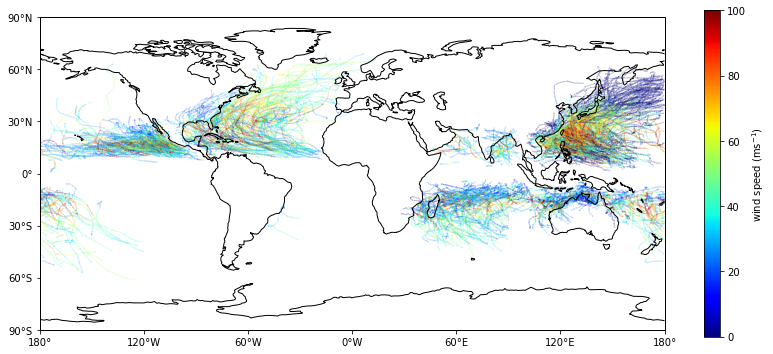

In [81]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib as mpl
dir_figs = 'f:/data/tc_wakes/database/figs/hist/'
fig = plt.figure(figsize=(14,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
#ax.scatter(ds_all.lon,ds_all.lat,c=ds_all.sindex,s=.01)
ax.scatter(ds_all.lon,ds_all.lat,cmap=mpl.cm.jet,c=ds_all.wind,s=.01,vmin=0,vmax=100)
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
sm = plt.cm.ScalarMappable(cmap=mpl.cm.jet,norm=plt.Normalize(0,100))
sm._A = []
cb = plt.colorbar(sm,ax=ax)
cb.ax.set_ylabel('wind speed (ms$^{-1}$)')  
plt.savefig(dir_figs+'map_storms.png')

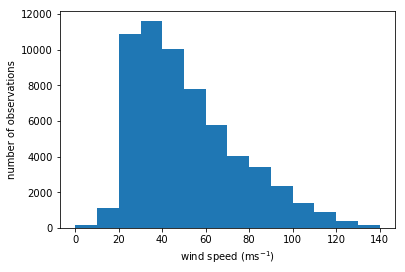

In [95]:
subset = ds_all.where(ds_all.wind>1)
plt.hist(subset.wind,bins=np.arange(0,150,10))
plt.xlabel('wind speed (ms$^{-1}$)')
plt.ylabel('number of observations')
plt.savefig(dir_figs+'hist_database_windspeed.png')

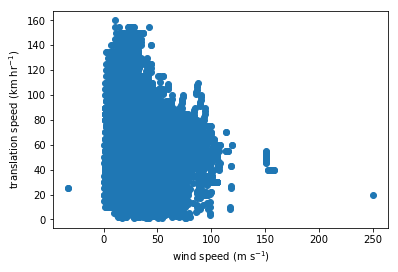

In [94]:
subset = ds_all.where(ds_all.wind>1)
plt.scatter(subset.storm_speed_kmhr,subset.wind)
plt.xlabel('wind speed (m s$^{-1}$)')
plt.ylabel('translation speed (km hr$^{-1}$)')
plt.savefig(dir_figs+'hist_database_translation.png')

In [98]:
ds_all.wind

<xarray.DataArray 'wind' (i2: 70418)>
array([20., 25., 25., ..., 30., 25., 20.])
Dimensions without coordinates: i2